In [27]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e97541e17b9547fe9a84d420651b9147',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [28]:
type(data)

dict

In [29]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [30]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12518,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.997647e+07,1.997647e+07,False,1.909413e+12,NaN,1,NaN,NaN,None,2026-01-16T06:13:00.000Z,95583.087808,4.946652e+10,-17.1491,0.197813,-0.852074,5.099601,10.048513,0.746274,-10.640368,1.909413e+12,59.1018,2.007245e+12,None,2026-01-16T06:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 11:45:08.086977
1,1027,Ethereum,ETH,ethereum,11407,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206946e+08,1.206946e+08,True,3.986674e+11,NaN,2,NaN,NaN,None,2026-01-16T06:13:00.000Z,3303.108123,2.595826e+10,-18.1440,0.309831,-0.345438,6.047320,12.356051,4.131785,-14.780594,3.986674e+11,12.3399,3.986674e+11,None,2026-01-16T06:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 11:45:08.086977
2,825,Tether USDt,USDT,tether,166974,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.868668e+11,1.907475e+11,True,1.906056e+11,NaN,3,NaN,NaN,None,2026-01-16T06:13:00.000Z,0.999256,1.005155e+11,-18.1640,-0.031293,-0.039475,0.044397,-0.054889,0.001543,-0.104541,1.867278e+11,5.7798,1.906056e+11,None,2026-01-16T06:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-16 11:45:08.086977
3,1839,BNB,BNB,bnb,3085,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.363613e+08,1.363613e+08,1.363613e+08,False,1.271270e+11,NaN,4,NaN,NaN,None,2026-01-16T06:14:00.000Z,932.280957,2.155920e+09,-21.0229,0.327812,-0.410218,3.913688,8.328147,0.079294,-14.625931,1.271270e+11,3.9349,1.271270e+11,None,2026-01-16T06:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 11:45:08.086977
4,52,XRP,XRP,xrp,1782,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.069908e+10,9.998573e+10,False,2.067227e+11,NaN,5,NaN,NaN,None,2026-01-16T06:13:00.000Z,2.067523,2.670853e+09,-31.7730,0.115644,-1.468345,-2.947370,7.405867,-8.145883,-11.863747,1.254967e+11,3.8845,2.067523e+11,None,2026-01-16T06:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 11:45:08.086977
5,5426,Solana,SOL,solana,1073,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.653226e+08,6.183640e+08,True,8.833113e+10,NaN,6,5.252369e+08,7.502825e+10,None,2026-01-16T06:13:00.000Z,142.846489,4.258347e+09,-27.4083,0.734557,-1.188048,2.249789,11.751894,1.830550,-23.053076,8.075435e+10,2.4996,8.833113e+10,None,2026-01-16T06:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 11:45:08.086977
6,3408,USDC,USDC,usd-coin,36397,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.564267e+10,7.564267e+10,False,7.560791e+10,NaN,7,6.090122e+10,6.087323e+10,None,2026-01-16T06:13:00.000Z,0.999540,1.329593e+10,-31.8379,-0.015023,-0.015798,-0.022806,-0.039420,-0.001365,-0.040674,7.560791e+10,2.3403,7.560791e+10,None,2026-01-16T06:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-16 11:45:08.086977
7,1958,TRON,TRX,tron,1279,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.470576e+10,9.470578e+10,True,2.934312e+10,NaN,8,9.466789e+10,2.933138e+10,None,2026-01-16T06:13:00.000Z,0.309835,8.136468e+08,13.7930,0.136148,1.209552,5.443263,10.569730,5.939245,-0.895925,2.934312e+10,0.9083,2.934312e+10,None,2026-01-16T

In [48]:
def api_runner():

            global df
            url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
            #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
            parameters = {
              'start':'1',
              'limit':'15',
              'convert':'USD'
            }
            headers = {
              'Accepts': 'application/json',
              'X-CMC_PRO_API_KEY': 'e97541e17b9547fe9a84d420651b9147',
            }
            
            session = Session()
            session.headers.update(headers)
            
            try:
              response = session.get(url, params=parameters)
              data = json.loads(response.text)
              #print(data)
            except (ConnectionError, Timeout, TooManyRedirects) as e:
              print(e)
            
            #NOTE:
            # I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
            # Into the Anaconda Prompt to change this to allow to pull data


            df2 = pd.json_normalize(data['data'])
            df2['timestamp'] = pd.to_datetime('now')
            df = pd.concat([df, df2], ignore_index=True)

            # Save to CSV
            file_path = r'C:\Users\DELL\Desktop\Automating Crypto Website\API.csv'
            if not os.path.isfile(file_path):
                   df2.to_csv(file_path, index=False, header=True)
            else:
                  df2.to_csv(file_path, mode='a', index=False, header=False)

            print(f"Batch saved, total rows in memory: {len(df)}")
            
            
            # If that didn't work try using the local host URL as shown in the video

In [49]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

Batch saved, total rows in memory: 60
API Runner completed


KeyboardInterrupt: 

In [50]:
df72 = pd.read_csv(r"C:\Users\DELL\Desktop\Automating Crypto Website\API.csv")
df72

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12518,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.997647e+07,1.997647e+07,False,1.909977e+12,NaN,1,NaN,NaN,NaN,2026-01-16T06:40:00.000Z,95611.317762,4.986094e+10,-15.5689,0.193792,-0.642007,5.085396,10.191252,0.759359,-10.477471,1.909977e+12,59.0872,2.007838e+12,NaN,2026-01-16T06:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 12:12:08.193482
1,1027,Ethereum,ETH,ethereum,11407,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206946e+08,1.206946e+08,True,3.994937e+11,NaN,2,NaN,NaN,NaN,2026-01-16T06:40:00.000Z,3309.954642,2.587799e+10,-17.3661,0.207668,-0.078820,6.125097,12.701110,4.022107,-14.349220,3.994937e+11,12.3588,3.994937e+11,NaN,2026-01-16T06:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 12:12:08.193482
2,825,Tether USDt,USDT,tether,166981,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.868668e+11,1.907475e+11,True,1.906341e+11,NaN,3,NaN,NaN,NaN,2026-01-16T06:40:00.000Z,0.999406,1.008273e+11,-17.5865,-0.010733,-0.024815,0.057000,-0.031967,0.014418,-0.095434,1.867558e+11,5.7775,1.906341e+11,NaN,2026-01-16T06:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-16 12:12:08.193482
3,1839,BNB,BNB,bnb,3085,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.363613e+08,1.363613e+08,1.363613e+08,False,1.273357e+11,NaN,4,NaN,NaN,NaN,2026-01-16T06:41:00.000Z,933.811179,2.151923e+09,-20.7376,0.290007,-0.118885,4.307577,7.879699,0.361693,-14.836145,1.273357e+11,3.9393,1.273357e+11,NaN,2026-01-16T06:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 12:12:08.193482
4,52,XRP,XRP,xrp,1782,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.069908e+10,9.998573e+10,False,2.071358e+11,NaN,5,NaN,NaN,NaN,2026-01-16T06:40:00.000Z,2.071653,2.647268e+09,-31.6677,0.196025,-0.924944,-3.111351,7.660316,-8.095912,-11.540222,1.257474e+11,3.8901,2.071653e+11,NaN,2026-01-16T06:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 12:12:08.193482
5,5426,Solana,SOL,solana,1073,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.653226e+08,6.183640e+08,True,8.849211e+10,NaN,6,5.252369e+08,7.516499e+10,NaN,2026-01-16T06:40:00.000Z,143.106827,4.239645e+09,-27.2748,0.693871,-0.754858,2.352449,11.935905,1.698169,-22.807852,8.090153e+10,2.5028,8.849211e+10,NaN,2026-01-16T06:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 12:12:08.193482
6,3408,USDC,USDC,usd-coin,36397,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.564267e+10,7.564267e+10,False,7.561238e+10,NaN,7,6.090122e+10,6.087684e+10,NaN,2026-01-16T06:40:00.000Z,0.999600,1.328439e+10,-31.7740,-0.000811,-0.008887,-0.044480,-0.017247,-0.021569,-0.030653,7.561238e+10,2.3391,7.561238e+10,NaN,2026-01-16T06:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-16 12:12:08.193482
7,1958,TRON,TRX,tron,1279,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.470576e+10,9.470578e+10,True,2.934192e+10,NaN,8,9.466789e+10,2.933018e+10,NaN,2026-01-16T06:40:00.000Z,0.309822,8.112538e+08,15.3117,0.097655,1.252444,5.474055,10.618579,5.885079,-0.859310,2.934191e+10,0.9077,2.934192e+10,NaN,2026-01-16T06:40:00.000Z,Na

In [51]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12518,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.997647e+07,1.997647e+07,False,1.909986e+12,NaN,1,NaN,NaN,None,2026-01-16T06:38:00.000Z,95611.794548,4.976860e+10,-16.0833,0.255111,-0.639463,5.111218,10.102093,0.763784,-10.476909,1.909986e+12,59.0874,2.007848e+12,None,2026-01-16T06:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 12:09:32.847391
1,1027,Ethereum,ETH,ethereum,11407,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206946e+08,1.206946e+08,True,3.994960e+11,NaN,2,NaN,NaN,None,2026-01-16T06:38:00.000Z,3309.973894,2.587442e+10,-17.4895,0.459048,-0.069937,6.167010,12.564234,3.998020,-14.339703,3.994960e+11,12.3588,3.994960e+11,None,2026-01-16T06:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 12:09:32.847391
2,825,Tether USDt,USDT,tether,166981,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.868668e+11,1.907475e+11,True,1.906639e+11,NaN,3,NaN,NaN,None,2026-01-16T06:38:00.000Z,0.999562,1.007304e+11,-17.7778,0.010029,-0.013357,0.075262,-0.034000,0.029588,-0.081960,1.867850e+11,5.7784,1.906639e+11,None,2026-01-16T06:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-16 12:09:32.847391
3,1839,BNB,BNB,bnb,3085,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.363613e+08,1.363613e+08,1.363613e+08,False,1.272986e+11,NaN,4,NaN,NaN,None,2026-01-16T06:39:00.000Z,933.539292,2.151967e+09,-20.7862,0.307363,-0.157043,4.273779,7.787190,0.325723,-14.848245,1.272986e+11,3.9381,1.272986e+11,None,2026-01-16T06:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 12:09:32.847391
4,52,XRP,XRP,xrp,1782,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.069908e+10,9.998573e+10,False,2.071114e+11,NaN,5,NaN,NaN,None,2026-01-16T06:38:00.000Z,2.071409,2.647929e+09,-31.7188,0.249286,-0.972503,-3.069599,7.640245,-8.093974,-11.623933,1.257326e+11,3.8897,2.071409e+11,None,2026-01-16T06:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 12:09:32.847391
5,5426,Solana,SOL,solana,1073,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.653226e+08,6.183640e+08,True,8.847930e+10,NaN,6,5.252369e+08,7.515410e+10,None,2026-01-16T06:38:00.000Z,143.086104,4.241787e+09,-27.2301,0.751738,-0.795566,2.340815,11.904596,1.719365,-22.857042,8.088981e+10,2.5024,8.847930e+10,None,2026-01-16T06:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 12:09:32.847391
6,3408,USDC,USDC,usd-coin,36397,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.564267e+10,7.564267e+10,False,7.562524e+10,NaN,7,6.090122e+10,6.088719e+10,None,2026-01-16T06:38:00.000Z,0.999770,1.329465e+10,-31.7798,0.010638,0.005375,0.001466,-0.011434,-0.012813,-0.009981,7.562524e+10,2.3395,7.562524e+10,None,2026-01-16T06:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-16 12:09:32.847391
7,1958,TRON,TRX,tron,1279,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.470576e+10,9.470578e+10,True,2.934265e+10,NaN,8,9.466789e+10,2.933091e+10,None,2026-01-16T06:38:00.000Z,0.309830,8.115963e+08,15.2289,0.113413,1.278170,5.445619,10.630951,5.862413,-0.912141,2.934264e+10,0.9077,2.934265e+10,None,2026-01-16T06:3

In [52]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [53]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12518,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19976471.00000,19976471.00000,False,1909986241052.15991,NaN,1,NaN,NaN,None,2026-01-16T06:38:00.000Z,95611.79455,49768598999.29562,-16.08330,0.25511,-0.63946,5.11122,10.10209,0.76378,-10.47691,1909986241052.16016,59.08740,2007847685514.38989,None,2026-01-16T06:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 12:09:32.847391
1,1027,Ethereum,ETH,ethereum,11407,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120694612.72323,120694612.72323,True,399496017234.00000,NaN,2,NaN,NaN,None,2026-01-16T06:38:00.000Z,3309.97389,25874416225.33353,-17.48950,0.45905,-0.06994,6.16701,12.56423,3.99802,-14.33970,399496017233.99896,12.35880,399496017234.00000,None,2026-01-16T06:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 12:09:32.847391
2,825,Tether USDt,USDT,tether,166981,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,186866822414.56506,190747472198.06125,True,190663936429.38000,NaN,3,NaN,NaN,None,2026-01-16T06:38:00.000Z,0.99956,100730393860.71442,-17.77780,0.01003,-0.01336,0.07526,-0.03400,0.02959,-0.08196,186784986134.00577,5.77840,190663936429.38000,None,2026-01-16T06:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-16 12:09:32.847391
3,1839,BNB,BNB,bnb,3085,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",136361269.43000,136361269.43000,136361269.43000,False,127298602913.89999,NaN,4,NaN,NaN,None,2026-01-16T06:39:00.000Z,933.53929,2151967402.53138,-20.78620,0.30736,-0.15704,4.27378,7.78719,0.32572,-14.84824,127298602913.90175,3.93810,127298602913.89999,None,2026-01-16T06:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 12:09:32.847391
4,52,XRP,XRP,xrp,1782,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60699081830.00000,99985731168.00000,False,207111377101.50000,NaN,5,NaN,NaN,None,2026-01-16T06:38:00.000Z,2.07141,2647928622.38631,-31.71880,0.24929,-0.97250,-3.06960,7.64025,-8.09397,-11.62393,125732644845.94157,3.88970,207140933693.32999,None,2026-01-16T06:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 12:09:32.847391
5,5426,Solana,SOL,solana,1073,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,565322625.15829,618363996.69337,True,88479295145.81000,NaN,6,525236893.30000,75154100743.68102,None,2026-01-16T06:38:00.000Z,143.08610,4241786692.35216,-27.23010,0.75174,-0.79557,2.34081,11.90460,1.71936,-22.85704,80889811941.60266,2.50240,88479295145.81000,None,2026-01-16T06:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-16 12:09:32.847391
6,3408,USDC,USDC,usd-coin,36397,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,75642667663.89642,75642667663.89642,False,75625237225.59000,NaN,7,60901219650.23000,60887186102.96371,None,2026-01-16T06:38:00.000Z,0.99977,13294647774.00990,-31.77980,0.01064,0.00537,0.00147,-0.01143,-0.01281,-0.00998,75625237225.58820,2.33950,75625237225.59000,None,2026-01-16T06:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-16 12:09:32.847391
7,1958,TRON,TRX,tron,1279,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94705757601.97986,94705780467.869

In [54]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.20562,-0.61795,5.10929,10.16313,0.78577,-10.46109
Ethereum,0.31110,-0.03990,6.16992,12.68804,4.03701,-14.32206
Tether USDt,0.00249,-0.01487,0.07302,-0.02985,0.03259,-0.08334
BNB,0.28877,-0.08409,4.31850,7.86835,0.36816,-14.83953
XRP,0.22273,-0.92270,-3.11664,7.68910,-8.07529,-11.56153
Solana,0.70110,-0.75706,2.33759,11.97644,1.72253,-22.82835
USDC,0.00626,0.00133,-0.00761,-0.01452,-0.00893,-0.01665
TRON,0.10522,1.26873,5.46107,10.63780,5.88079,-0.88950
Dogecoin,0.39655,-1.98714,-1.74769,6.93416,-12.94602,-24.87074


In [55]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.20562
              quote.USD.percent_change_24h    -0.61795
              quote.USD.percent_change_7d      5.10929
              quote.USD.percent_change_30d    10.16313
              quote.USD.percent_change_60d     0.78577
              quote.USD.percent_change_90d   -10.46109
Ethereum      quote.USD.percent_change_1h      0.31110
              quote.USD.percent_change_24h    -0.03990
              quote.USD.percent_change_7d      6.16992
              quote.USD.percent_change_30d    12.68804
              quote.USD.percent_change_60d     4.03701
              quote.USD.percent_change_90d   -14.32206
Tether USDt   quote.USD.percent_change_1h      0.00249
              quote.USD.percent_change_24h    -0.01487
              quote.USD.percent_change_7d      0.07302
              quote.USD.percent_change_30d    -0.02985
              quote.USD.percent_change_60d     0.03259
              quote.US

In [56]:
type(df4)

pandas.core.series.Series

In [57]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.20562
             quote.USD.percent_change_24h  -0.61795
             quote.USD.percent_change_7d    5.10929
             quote.USD.percent_change_30d  10.16313
             quote.USD.percent_change_60d   0.78577
             quote.USD.percent_change_90d -10.46109
Ethereum     quote.USD.percent_change_1h    0.31110
             quote.USD.percent_change_24h  -0.03990
             quote.USD.percent_change_7d    6.16992
             quote.USD.percent_change_30d  12.68804
             quote.USD.percent_change_60d   4.03701
             quote.USD.percent_change_90d -14.32206
Tether USDt  quote.USD.percent_change_1h    0.00249
             quote.USD.percent_change_24h  -0.01487
             quote.USD.percent_change_7d    0.07302
             quote.USD.percent_change_30d  -0.02985
             quote.USD.percent_change_60d   0.03259
             quote.USD.percent_change_90d  -0.08334
BNB          quote.USD.percent_change_1h    0.28877
             quote.USD.percent_change_24h  -0.08409
             quote.USD.percent_change_7d    4.31850
             quote.USD.percent_change_30d   7.86835
             quote.USD.percent_change_60d   0.36816
             quote.USD.percent_change_90d -14.83953
XRP          quote.USD.percent_change_1h    0.22273
             quote.USD.percent_change_24h  -0.92270
             quote.USD.percent_change_7d   -3.11664
             quote.USD.percent_change_30d   7.68910
             quote.USD.percent_change_60d  -8.07529
             quote.USD.percent_change_90d -11.56153
Solana       quote.USD.percent_change_1h    0.70110
             quote.USD.percent_change_24h  -0.75706
             quote.USD.percent_change_7d    2.33759
             quote.USD.percent_change_30d  11.97644
             quote.USD.percent_change_60d   1.72253
             quote.USD.percent_change_90d -22.82835
USDC         quote.USD.percent_change_1h    0.00626
             quote.USD.percent_change_24h   0.00133
             quote.USD.percent_change_7d   -0.00761
             quote.USD.percent_change_30d  -0.01452
             quote.USD.percent_change_60d  -0.00893
             quote.USD.percent_change_90d  -0.01665
TRON         quote.USD.percent_change_1h    0.10522
             quote.USD.percent_change_24h   1.26873
             quote.USD.percent_change_7d    5.46107
             quote.USD.percent_change_30d  10.63780
             quote.USD.percent_change_60d   5.88079
             quote.USD.percent_change_90d  -0.88950
Dogecoin     quote.USD.percent_change_1h    0.39655
             quote.USD.percent_change_24h  -1.98714
             quote.USD.percent_change_7d   -1.74769
             quote.USD.percent_change_30d   6.93416
             quote.USD.percent_change_60d -12.94602
             quote.USD.percent_change_90d -24.87074
Cardano      quote.USD.percent_change_1h    0.37069
             quote.USD.percent_change_24h  -2.03352
             quote.USD.percent_change_7d   -1.02775
             quote.USD.percent_change_30d   3.27011
             quote.USD.percent_change_60d -19.95886
             quote.USD.percent_change_90d -37.34243
Monero       quote.USD.percent_change_1h    0.85346
             quote.USD.percent_change_24h  -2.32314
             quote.USD.percent_change_7d   47.13297
             quote.USD.percent_change_30d  58.28044
             quote.USD.percent_change_60d  71.97889
             quote.USD.percent_change_90d 131.89744
Bitcoin Cash quote.USD.percent_change_1h    0.28086
             quote.USD.percent_change_24h  -1.77721
             quote.USD.percent_change_7d   -5.24542
             quote.USD.percent_change_30d  10.07169
             quote.USD.percent_change_60d  23.08749
             quote.USD.percent_change_90d  26.68878
Chainlink    quote.USD.percent_change_1h    0.42388
             quote.USD.percent_change_24h  -0.49345
             quote.USD.percent_change_7d    3.99201
             quote.USD.percent_change_30d

In [58]:
df5.count()

values    90
dtype: int64

In [59]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,values
0,0.20562
1,-0.61795
2,5.10929
3,10.16313
4,0.78577
5,-10.46109
6,0.31110
7,-0.03990
8,6.16992
9,12.68804


          name symbol percent_change    value
0      Bitcoin    BTC            24h -0.63946
1     Ethereum    ETH            24h -0.06994
2  Tether USDt   USDT            24h -0.01336
3          BNB    BNB            24h -0.15704
4          XRP    XRP            24h -0.97250


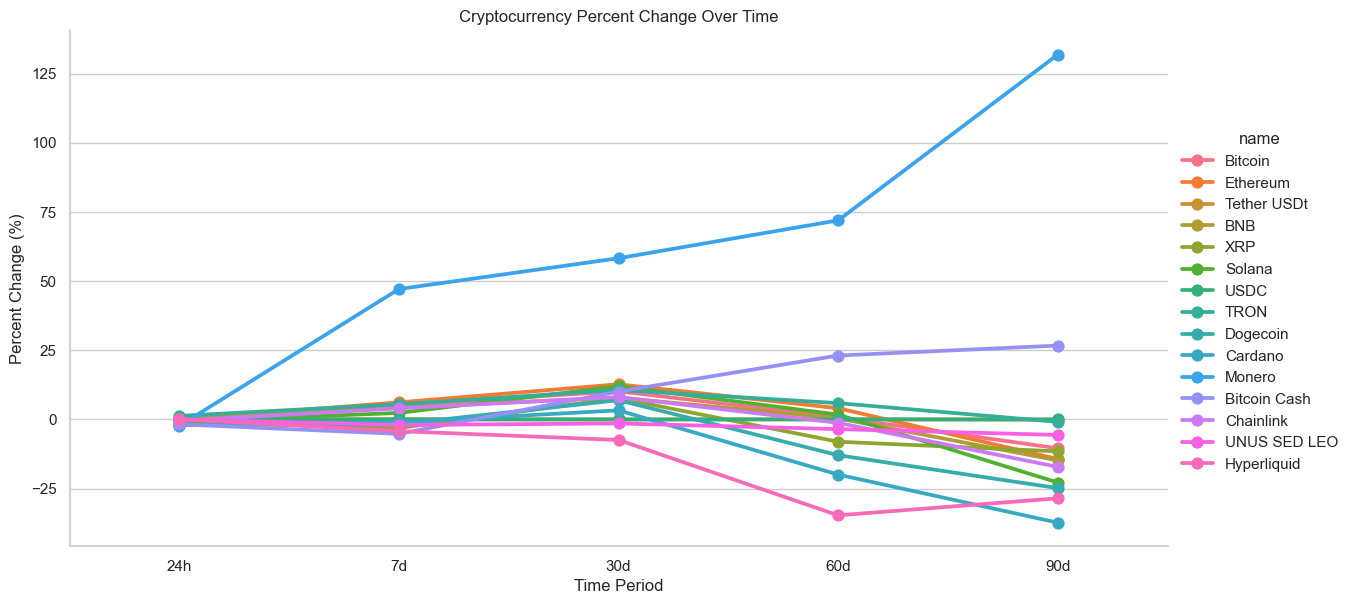

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your normalized CoinMarketCap data
# Example columns might include: id, name, symbol, quote.USD.percent_change_24h, quote.USD.percent_change_7d, ...

# 1️⃣ Rename percent_change columns for clarity
df = df.rename(columns={
    'quote.USD.percent_change_24h': '24h',
    'quote.USD.percent_change_7d': '7d',
    'quote.USD.percent_change_30d': '30d',
    'quote.USD.percent_change_60d': '60d',
    'quote.USD.percent_change_90d': '90d'
})

# 2️⃣ Melt the DataFrame to long format
df_melted = df.melt(
    id_vars=['name', 'symbol'],        # keep these columns
    value_vars=['24h', '7d', '30d', '60d', '90d'],  # the percent change columns
    var_name='percent_change',         # new column with '24h', '7d', etc.
    value_name='value'                 # the actual percentage values
)

# 3️⃣ Check the melted DataFrame
print(df_melted.head())

# 4️⃣ Plot using Seaborn
sns.set(style="whitegrid")
sns.catplot(
    x='percent_change',
    y='value',
    hue='name',        # different coin names
    data=df_melted,
    kind='point',
    height=6,
    aspect=2
)

plt.xticks(rotation=0)
plt.ylabel("Percent Change (%)")
plt.xlabel("Time Period")
plt.title("Cryptocurrency Percent Change Over Time")
plt.show()


In [75]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,95611.79455,2026-01-16 12:09:32.847391
15,Bitcoin,95611.79455,2026-01-16 12:09:32.847391
30,Bitcoin,95611.31776,2026-01-16 12:12:08.193482
45,Bitcoin,95675.65246,2026-01-16 12:16:35.396344


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

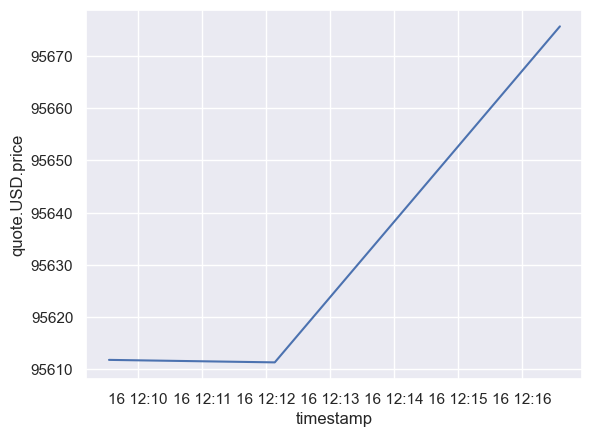

In [76]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)